Major Chnage in version v of resnet 50 

* in the last version i have tried using batch size 32 , there no drop in performance 
* In this version  of resnet that v4, i will try a different ratio of train , test & validation split of the data 70, 15, 15

Outcome :- 

1. with this split also accurecy is as good as the old one 

I will consider this model as the final model of resnet 50 


In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_height, img_width = (224,224)
batch_size = 32 

train_data_dir = r"F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\train"
valid_data_dir =  r"F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\val"
test_data_dir = r"F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test"

In [3]:

train_generator =ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=train_data_dir, target_size=(224,224), batch_size=batch_size)

valid_generator =ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=valid_data_dir, target_size=(224,224), batch_size=batch_size)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=test_data_dir, target_size=(224,224), batch_size=1, shuffle=False)




Found 8605 images belonging to 9 classes.
Found 1841 images belonging to 9 classes.
Found 1854 images belonging to 9 classes.


In [4]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [5]:
base_model = ResNet50(include_top=False, weights= "imagenet")

In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(train_generator.num_classes, activation='softmax' )(x) 
model = Model(inputs= base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001), loss="categorical_crossentropy", metrics = ['accuracy'])

In [7]:
history = model.fit(train_generator,epochs = 15  ,validation_data = valid_generator,verbose =1)

Epoch 1/15
269/269 [==============================] - 302s 1s/step - loss: 1.4867 - accuracy: 0.5619 - val_loss: 0.9212 - val_accuracy: 0.8077
Epoch 2/15
269/269 [==============================] - 139s 515ms/step - loss: 0.6773 - accuracy: 0.8845 - val_loss: 0.5263 - val_accuracy: 0.9223
Epoch 3/15
269/269 [==============================] - 141s 524ms/step - loss: 0.4093 - accuracy: 0.9471 - val_loss: 0.3436 - val_accuracy: 0.9495
Epoch 4/15
269/269 [==============================] - 142s 526ms/step - loss: 0.2768 - accuracy: 0.9701 - val_loss: 0.2449 - val_accuracy: 0.9745
Epoch 5/15
269/269 [==============================] - 143s 530ms/step - loss: 0.2025 - accuracy: 0.9838 - val_loss: 0.1892 - val_accuracy: 0.9788
Epoch 6/15
269/269 [==============================] - 142s 529ms/step - loss: 0.1544 - accuracy: 0.9893 - val_loss: 0.1477 - val_accuracy: 0.9864
Epoch 7/15
269/269 [==============================] - 143s 531ms/step - loss: 0.1220 - accuracy: 0.9923 - val_loss: 0.1192 - va

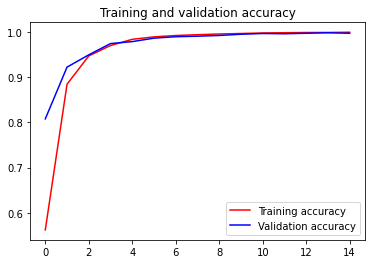

<Figure size 432x288 with 0 Axes>

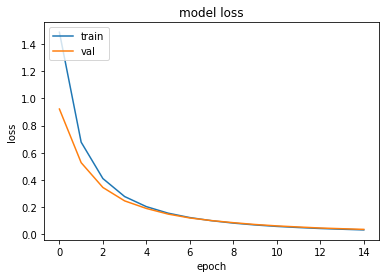

In [8]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
model.save(r"F:\Study\PGDAIML\Project-10\phase-5\ResNet50\saved_model\resnet-model-5-Date-11-02-22_Acc-100-batch-32-dataset-70-15-15.h5")

C:\Users\Arnab\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [10]:
test_loss, test_acc = model.evaluate(test_generator,verbose=2)

1854/1854 - 65s - loss: 0.0333 - accuracy: 0.9984 - 65s/epoch - 35ms/step


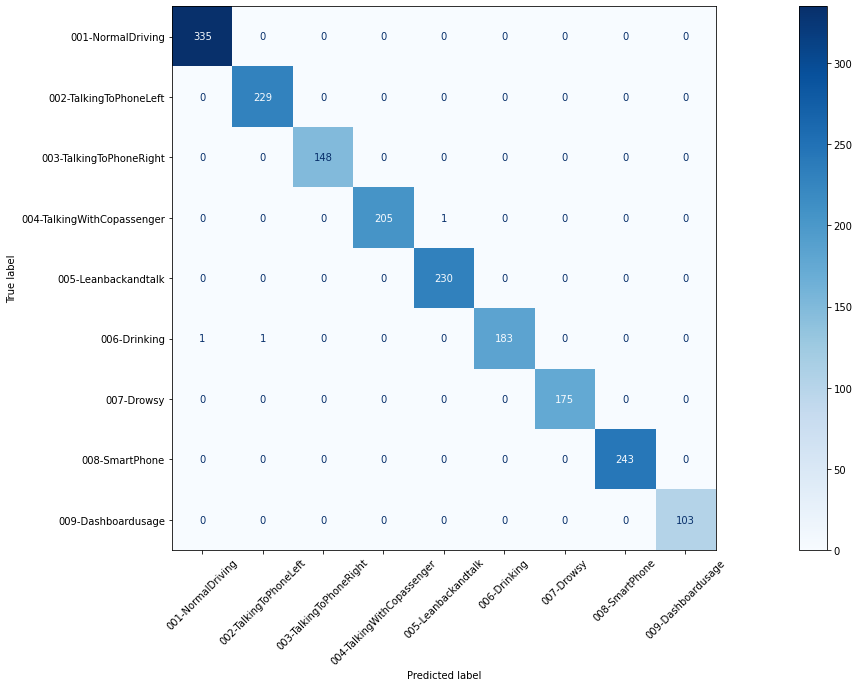

<Figure size 2160x720 with 0 Axes>

In [11]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

filenames= test_generator.filenames
nb_samples = len(test_generator)

y_prob=[]

y_act=[]

test_generator.reset()

for _ in range(nb_samples):

    X_test,Y_test = test_generator.next() 
    y_prob.append(model.predict(X_test)) 
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob] 

actual_class= [list (train_generator.class_indices.keys())[i.argmax()] for i in y_act]


cm = confusion_matrix(actual_class, predicted_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list (test_generator.class_indices))


plt.rcParams["figure.figsize"] = (30, 10)

disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()
plt.tight_layout()

Error Analysis

In [12]:
paths = test_generator.filepaths


print(len(paths))
print(len(predicted_class))

for i in range(len(predicted_class)):
    if predicted_class[i] !=  actual_class[i]:
        print(paths[i])


1854
1854
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\004-TalkingWithCopassenger\1 490.jpg
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\006-Drinking\2 140.jpg
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\006-Drinking\3-arnab 401.jpg
